In [1]:
import pandas as pd

df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## در این قسمت اومدیم فقط ستون‌های عددی دیتاست رو برداشتیم. بعدش با استفاده از توابع آماری مختلف مثل کمینه، بیشینه، چارک‌ها، واریانس و انحراف معیار سعی کردیم یه تصویر کلی از داده‌هامون داشته باشیم. این اطلاعات کمک می‌کنن بفهمیم داده‌هامون چطور پخش شدن و آیا پراکندگی خاصی دارن یا نه

In [2]:
numeric_df = df.select_dtypes(include=['number'])

summary_stats = pd.DataFrame(index=numeric_df.columns)
summary_stats['Min'] = numeric_df.min()
summary_stats['Q1'] = numeric_df.quantile(0.25)
summary_stats['Median'] = numeric_df.median()
summary_stats['Q3'] = numeric_df.quantile(0.75)
summary_stats['Max'] = numeric_df.max()
summary_stats['IQR'] = summary_stats['Q3'] - summary_stats['Q1']
summary_stats['Range'] = summary_stats['Max'] - summary_stats['Min']
summary_stats['Variance'] = numeric_df.var()
summary_stats['Std Deviation'] = numeric_df.std()

summary_stats.round(2)

,Min,Q1,Median,Q3,Max,IQR,Range,Variance,Std Deviation
Administrative,0.0,0.00,1.00,4.00,27.00,4.00,27.00,11.03,3.32
Administrative_Duration,0.0,0.00,7.50,93.26,3398.75,93.26,3398.75,31250.85,176.78
Informational,0.0,0.00,0.00,0.00,24.00,0.00,24.00,1.61,1.27
Informational_Duration,0.0,0.00,0.00,0.00,2549.38,0.00,2549.38,19810.36,140.75
ProductRelated,0.0,7.00,18.00,38.00,705.00,31.00,705.00,1978.07,44.48
ProductRelated_Duration,0.0,184.14,598.94,1464.16,63973.52,1280.02,63973.52,3662130.14,1913.67
BounceRates,0.0,0.00,0.00,0.02,0.20,0.02,0.20,0.00,0.05
ExitRates,0.0,0.01,0.03,0.05,0.20,0.04,0.20,0.00,0.05
PageValues,0.0,0.00,0.00,0.00,361.76,0.00,361.76,344.79,18.57
SpecialDay,0.0,0.00,0.00,0.00,1.00,0.00,1.00,0.04,0.20


# Boxplot برای ویژگی‌های عددی
## توی این نمودار Boxplot ما تونستیم مقدارهای حداقل، حد اکثر، میانه و چارک‌های اول و سوم رو برای همه ستون‌های عددی نشون بدیم. این نمودار به ما کمک می‌کنه تا راحت‌تر مقدارهای پرت رو تشخیص بدیم

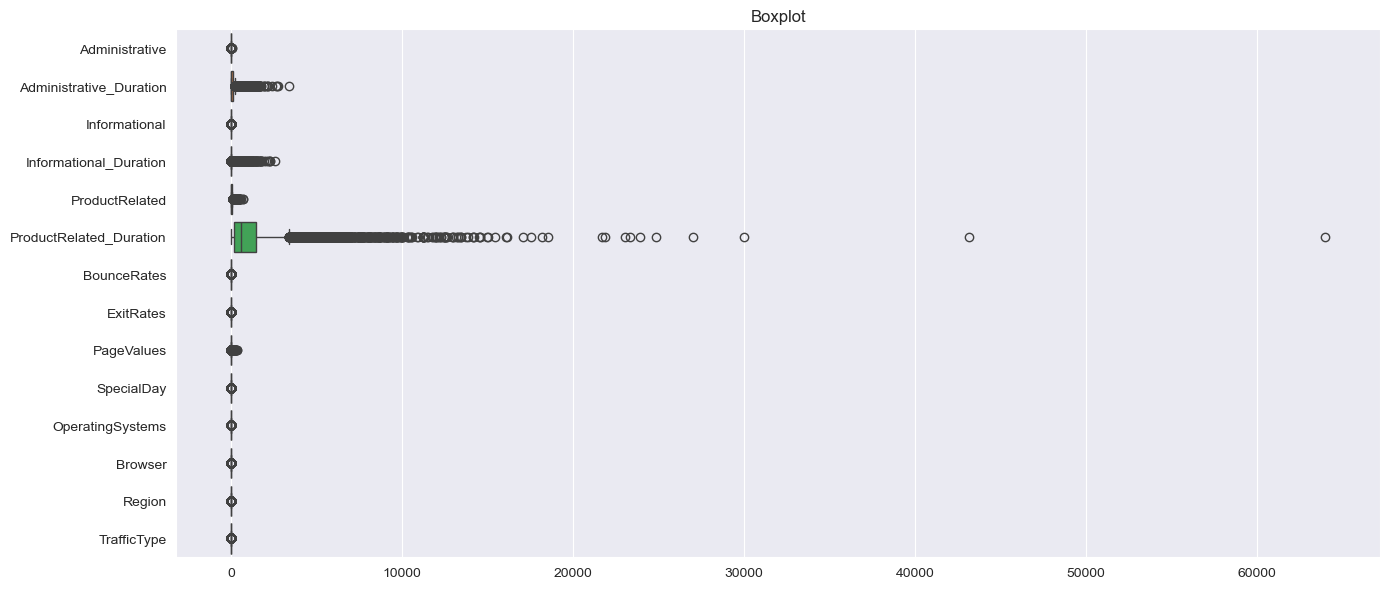

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=numeric_df, orient="h")
plt.title("Boxplot")
plt.tight_layout()
plt.show()


# Histogram برای توزیع یک ستون
## توی این هیستوگرام مشخص می‌کنه که چه مقدارهایی توی ستون Administrative_Duration بیشتر تکرار شدن. همچنین با استفاده از KDE می‌تونیم یه دید بهتر از توزیع داده‌ها داشته باشیم.

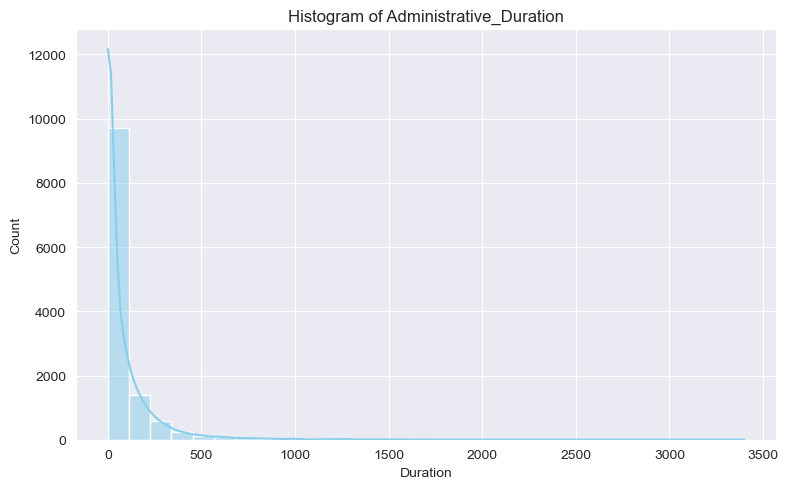

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Administrative_Duration'], kde=True, bins=30, color='skyblue')
plt.title("Histogram of Administrative_Duration")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

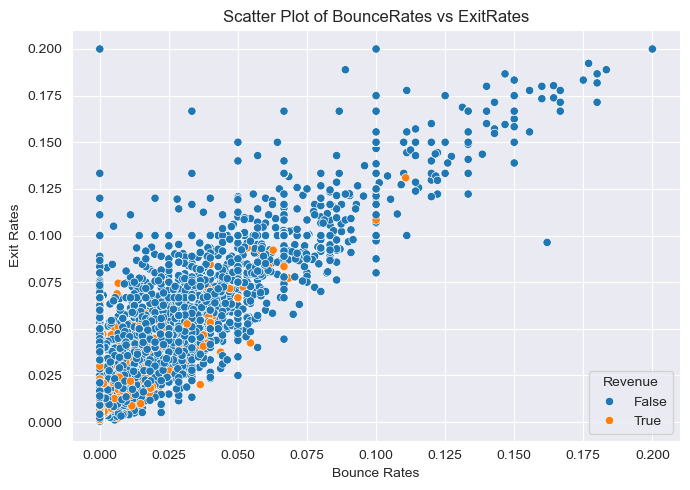

In [8]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='Revenue')
plt.title("Scatter Plot of BounceRates vs ExitRates")
plt.xlabel("Bounce Rates")
plt.ylabel("Exit Rates")
plt.legend(title='Revenue')
plt.tight_layout()
plt.show()

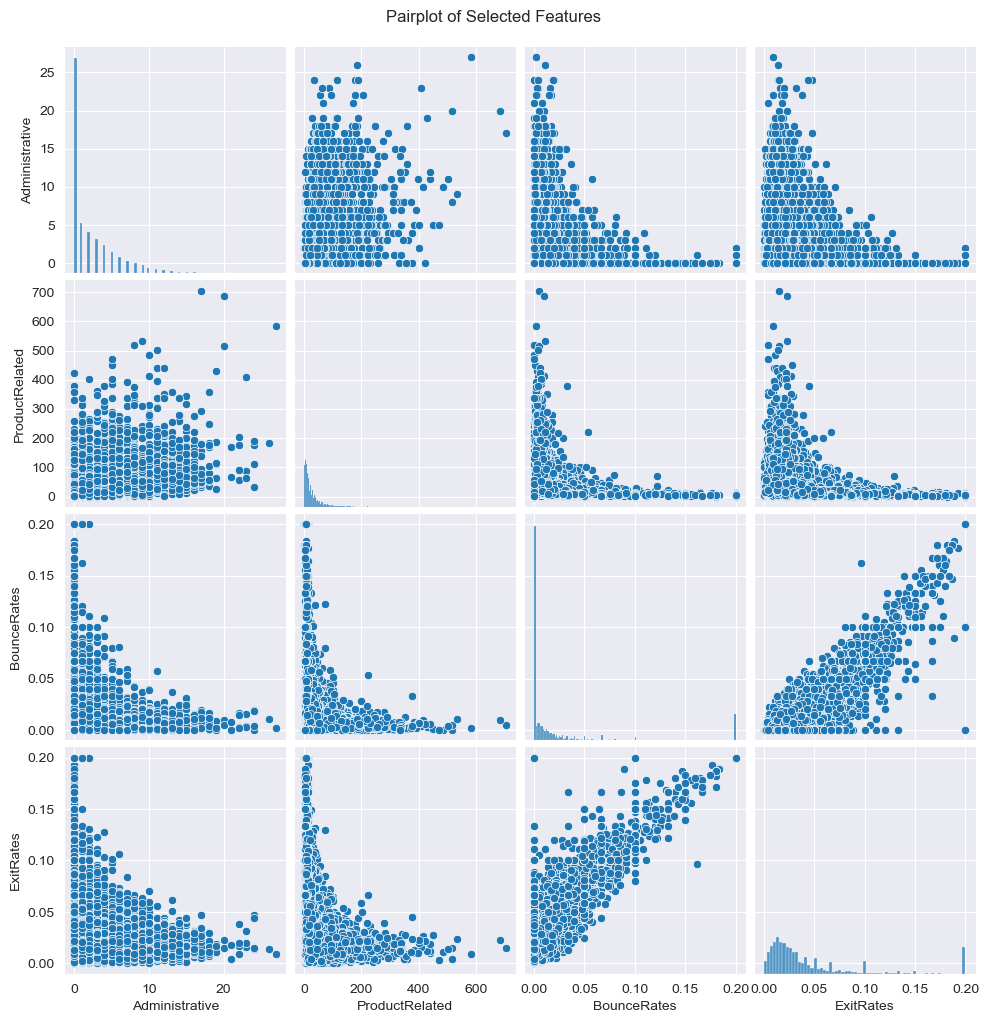

In [6]:
sns.pairplot(df[['Administrative', 'ProductRelated', 'BounceRates', 'ExitRates']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

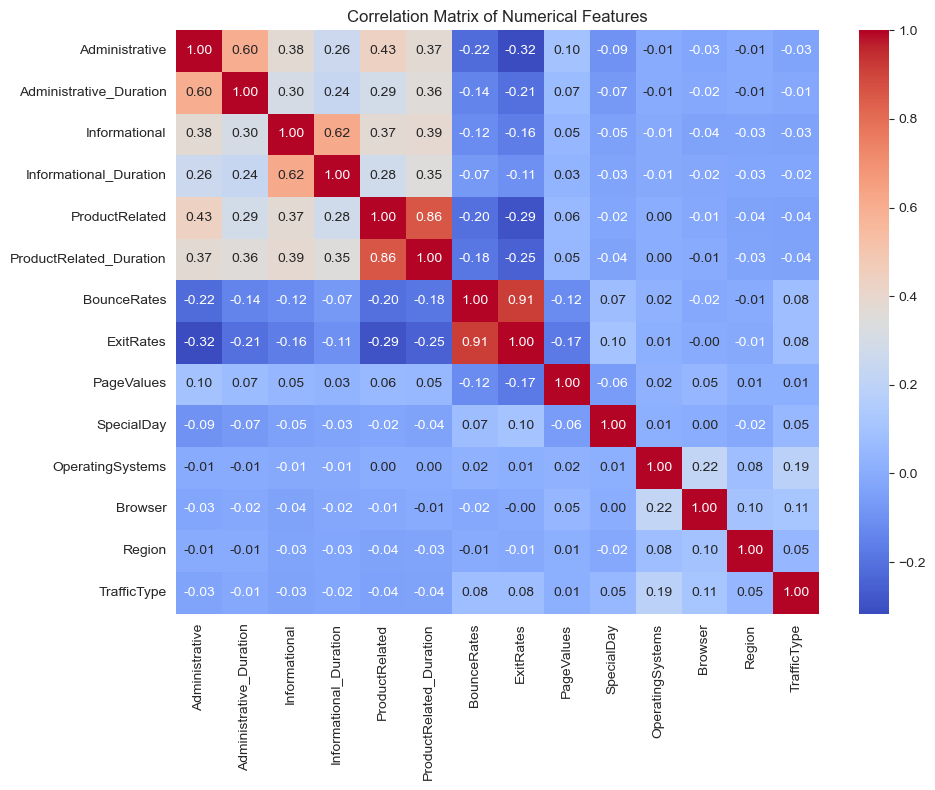

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [9]:
df_numerical = df.select_dtypes(include=['int64', 'float64']).copy()

if 'Revenue' in df_numerical.columns:
    df_numerical.drop(columns=['Revenue'], inplace=True)

df_numerical.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_numerical)

# تبدیل به DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df_numerical.columns)
normalized_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895


# کاهش ابعاد با PCA
## با استفاده از روش PCA، تعداد ویژگی‌های عددی رو به دو بعد اصلی کاهش دادیم. این کار باعث می‌شه تحلیل و خوشه‌بندی راحت‌تر انجام بشه و دید بهتری نسبت به ساختار داده‌ها داشته باشیم

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,1.161691,-0.278578
1,0.127404,-0.274689
2,1.156906,0.744132
3,0.448143,-0.131588
4,0.031690,-0.255107


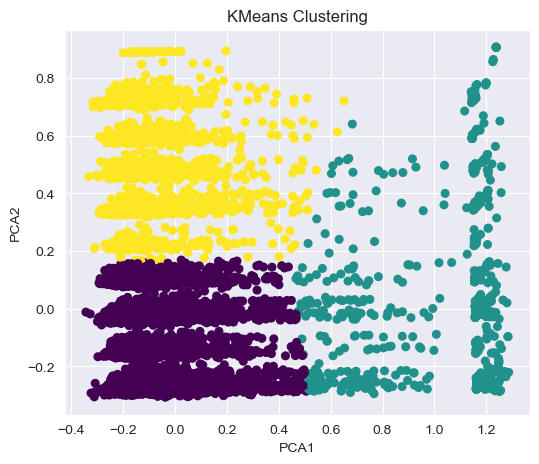

KMeans Silhouette Score: 0.5967


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# اجرای KMeans روی داده کاهش‌یافته با PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

plt.figure(figsize=(6, 5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans_labels, cmap='viridis', s=30)
plt.title('KMeans Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()
# محاسبه Silhouette Score
kmeans_silhouette = silhouette_score(pca_df, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")


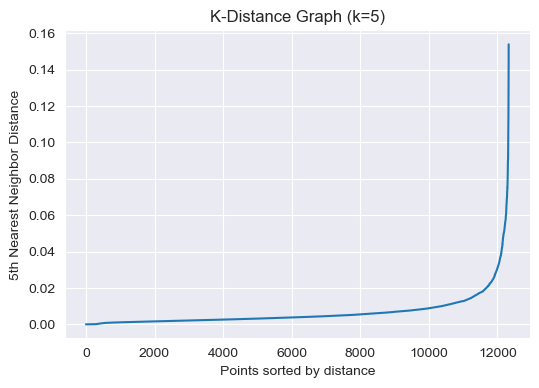

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# پیدا کردن فاصله تا 5-امین نزدیک‌ترین همسایه برای هر نقطه
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

# مرتب‌سازی فاصله‌ها و رسم نمودار
distances = np.sort(distances[:, 4])  # ستون 4 یعنی فاصله با پنجمین همسایه
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.title('K-Distance Graph (k=5)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


تعداد نقاط در هر خوشه (و نویز):
Counter({1: 11491, 0: 538, -1: 92, 4: 86, 2: 31, 5: 19, 3: 18, 6: 13, 13: 10, 10: 7, 7: 6, 9: 5, 12: 5, 8: 5, 11: 4})


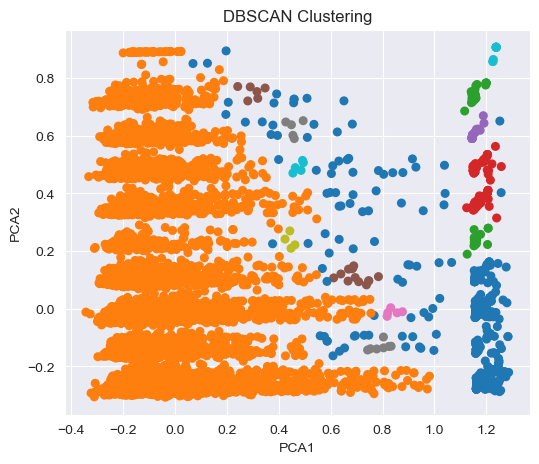

DBSCAN Silhouette Score: 0.3166


In [37]:
from sklearn.cluster import DBSCAN
from collections import Counter
# اجرای DBSCAN با پارامترهای اولیه
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

# محاسبه Silhouette Score (فقط اگه بیش از یک خوشه شناسایی شده باشه)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

label_counts = Counter(dbscan_labels)
print("تعداد نقاط در هر خوشه (و نویز):")
print(label_counts)

plt.figure(figsize=(6, 5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=dbscan_labels, cmap='tab10', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

if n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(pca_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN فقط یک خوشه یا همه را نویز تشخیص داد. Silhouette Score قابل محاسبه نیست.")


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# جدا کردن ویژگی‌ها و برچسب هدف
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# تعریف مدل با معیار entropy
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [50]:
from sklearn.naive_bayes import GaussianNB

# تعریف مدل Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


In [52]:
# ارزیابی مدل درخت تصمیم
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)

# ارزیابی مدل بیز ساده
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)

# مقایسه بین دو مدل
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_accuracy, nb_accuracy],
    'Precision': [dt_precision, nb_precision],
    'Recall': [dt_recall, nb_recall]
})

print(" مقایسه بین دو مدل:")
print(results)


 مقایسه بین دو مدل:
           Model  Accuracy  Precision    Recall
0  Decision Tree  0.853204   0.527491  0.533913
1    Naive Bayes  0.796702   0.410152  0.702609
